In [17]:
import networkx as nx
G = nx.DiGraph()
G.add_edge('S', 'A', weight=1)
G.add_edge('S', 'B', weight=2)
G.add_edge('A', 'C', weight=1)
G.add_edge('A', 'D', weight=3)
G.add_edge('B', 'C', weight=1)
G.add_edge('B', 'E', weight=5)
G.add_edge('C', 'D', weight=1)
G.add_edge('C', 'T', weight=7)
G.add_edge('C', 'E', weight=2)
G.add_edge('D', 'T', weight=4)
G.add_edge('D', 'E', weight=4)
G.add_edge('E', 'T', weight=2)
G

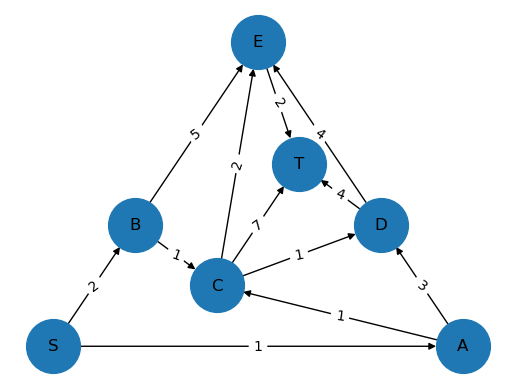

In [59]:
# Отрисуем граф, для наглядности
import matplotlib.pyplot as plt
import pylab
import numpy as np


edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
node_labels = {node:node for node in G.nodes()}

pos=nx.planar_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw(G,pos, node_size=1500)

pylab.show()

In [43]:
# Находим кратчайший путь
shortest_path = nx.shortest_path(G, 'S', 'T', weight='weight')

shortest_path

['S', 'A', 'C', 'E', 'T']

In [53]:
# Выделяем грани, из которых он состоит

even_edges = [
    a for a in zip(shortest_path[::2],shortest_path[1::2])
]

odd_edges = [
    b for b in zip(shortest_path[1::2],shortest_path[2::2])
]

path_edges = even_edges + odd_edges

path_edges

[('S', 'A'), ('C', 'E'), ('A', 'C'), ('E', 'T')]

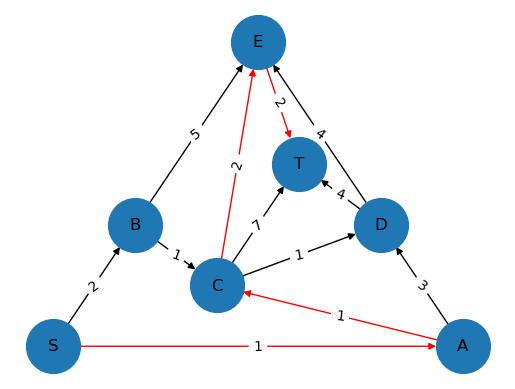

In [60]:
# Отрисуем граф ещё раз
# для наглядности выделив минимальный путь
import matplotlib.pyplot as plt
import pylab
import numpy as np


edge_labels=dict([((u,v,),d['weight'])
                 for u,v,d in G.edges(data=True)])
node_labels = {node:node for node in G.nodes()}
red_edges = path_edges
edge_colors = ['black' if not edge in red_edges else 'red' for edge in G.edges()]

pos=nx.planar_layout(G)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw_networkx_labels(G,pos,labels=node_labels)
nx.draw(G,pos, node_size=1500,edge_color=edge_colors,edge_cmap=plt.cm.Reds)

pylab.show()